In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv
/kaggle/input/brain-stroke-dataset/brain_stroke.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv
/kaggle/input/early-diabetes-classification/diabetes_data.csv


In [101]:
from sklearn.preprocessing import LabelEncoder 

In [102]:
train =  pd.read_csv("/kaggle/input/brain-stroke-dataset/brain_stroke.csv")

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [104]:
train.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [105]:
total = train.shape[0]
print(total);
stroke_positive = train[train['stroke'] == 1]
stroke_negative = train[train['stroke'] == 0]
stroke_positive_count = stroke_positive.shape[0];
stroke_negative_count = stroke_negative.shape[0];
print(stroke_positive_count, stroke_negative_count)
print(stroke_positive_count / total)
print(stroke_negative_count / total)

4981
248 4733
0.049789198956032926
0.950210801043967


In [106]:
print(train['gender'].unique())
print(train['ever_married'].unique())
print(train['work_type'].unique())
print(train['Residence_type'].unique())
print(train['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [107]:
train['gender'][train['gender'] == 'Male'] = 0
train['gender'][train['gender'] == 'Female'] = 1

train['ever_married'][train['ever_married'] == 'Yes'] = 0
train['ever_married'][train['ever_married'] == 'No'] = 1

train['work_type'][train['work_type'] == 'Private'] = 0
train['work_type'][train['work_type'] == 'Self-employed'] = 1
train['work_type'][train['work_type'] == 'Govt_job'] = 2
train['work_type'][train['work_type'] == 'children'] = 3

train['Residence_type'][train['Residence_type'] == 'Urban'] = 0
train['Residence_type'][train['Residence_type'] == 'Rural'] = 1

train['smoking_status'][train['smoking_status'] == 'formerly smoked'] = 0
train['smoking_status'][train['smoking_status'] == 'never smoked'] = 1
train['smoking_status'][train['smoking_status'] == 'smokes'] = 2
train['smoking_status'][train['smoking_status'] == 'Unknown'] = 3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [109]:
train['gender'] = pd.to_numeric(train['gender'])
train['ever_married'] = pd.to_numeric(train['ever_married'])
train['work_type'] = pd.to_numeric(train['work_type'])
train['Residence_type'] = pd.to_numeric(train['Residence_type'])
train['smoking_status'] = pd.to_numeric(train['smoking_status'])

In [110]:
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2,1
3,1,79.0,1,0,0,1,1,174.12,24.0,1,1
4,0,81.0,0,0,0,0,0,186.21,29.0,0,1


In [111]:
y = train['stroke']
x = train.drop('stroke', axis = 1)

In [112]:
x.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,0
1,0,80.0,0,1,0,0,1,105.92,32.5,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2


In [113]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 389.3 KB


<AxesSubplot:title={'center':'Correlation with Diabetes'}>

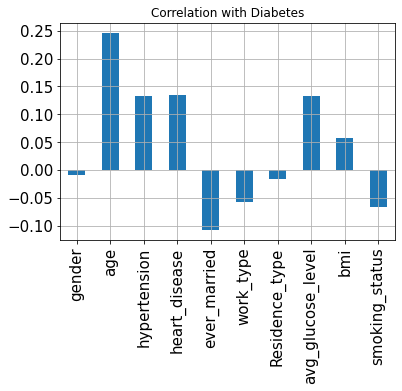

In [114]:
x.corrwith(y).plot.bar(
         title = "Correlation with Diabetes", fontsize = 15,
         grid = True)

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
minmax = MinMaxScaler()
x[['age']] = minmax.fit_transform(x[['age']])
x[['age']] = minmax.transform(x[['age']])

In [117]:
x.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,0.008995,0,1,0,0,0,228.69,36.6,0
1,0,0.010932,0,1,0,0,1,105.92,32.5,1
2,1,0.006313,0,0,0,0,0,171.23,34.4,2


In [118]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state = 12389)

In [120]:
x_train.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3863,0,0.001694,0,0,1,2,0,106.54,27.0,1


In [121]:
x_test.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
625,1,0.005717,0,0,0,0,1,89.21,21.6,0


In [122]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [123]:
logistic = LogisticRegression(random_state=0)
rf = RandomForestClassifier(criterion='gini', n_estimators=100)
svc = SVC(kernel='linear', random_state=0)
gNB = GaussianNB()

In [124]:
logistic.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [125]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [126]:
gNB.fit(x_train, y_train)

GaussianNB()

In [130]:
def training(modelName, modelObj):
    modelObj.fit(x_train, y_train)
    kfold = KFold(n_splits=8, random_state=7, shuffle=True)
    accuracy = cross_val_score(estimator=modelObj, X=x_train,
                          y=y_train, 
                          cv=kfold,
                          scoring='accuracy')
    
    y_predict_logistic = modelObj.predict(x_test)
    acc = accuracy_score(y_test, y_predict_logistic)
    return 'ModelName: '+ str(modelName) + ' Accuracy:  ' + str(round((acc * 100), 2)) + '%';

In [131]:
logisticRes = training('Logistic Regression', logistic)
rf = training('Random Forest', rf)
GaussianNB = training('Gaussian Naive Bias', gNB)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [132]:
print(logisticRes)
print(rf)
print(GaussianNB)

ModelName: Logistic Regression Accuracy:  94.98%
ModelName: Random Forest Accuracy:  94.48%
ModelName: Gaussian Naive Bias Accuracy:  87.36%
